In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [46]:
df = pd.read_csv('carprices.csv')

In [47]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [48]:
df[['Mileage', 'Sell Price($)', 'Age(yrs)']].corr()

,Mileage,Sell Price($),Age(yrs)
Mileage,1.000000,-0.927116,0.993452
Sell Price($),-0.927116,1.000000,-0.921741
Age(yrs),0.993452,-0.921741,1.000000


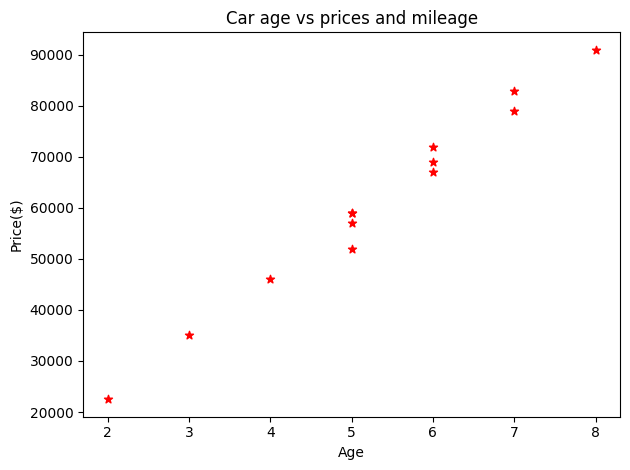

In [49]:
plt.scatter(df['Age(yrs)'], df['Mileage'], marker='*', color='r')
plt.xlabel('Age')
plt.ylabel('Price($)')
plt.title('Car age vs prices and mileage')
plt.tight_layout()

In [61]:
dummies = pd.get_dummies(df)
dummies

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,False,True,False
1,35000,34000,3,False,True,False
2,57000,26100,5,False,True,False
3,22500,40000,2,False,True,False
4,46000,31500,4,False,True,False
5,59000,29400,5,True,False,False
6,52000,32000,5,True,False,False
7,72000,19300,6,True,False,False
8,91000,12000,8,True,False,False
9,67000,22000,6,False,False,True


In [51]:
X = dummies.drop(['Car Model_Audi A5', 'Sell Price($)'], axis='columns')

In [52]:
X

,Mileage,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,6,True,False
1,35000,3,True,False
2,57000,5,True,False
3,22500,2,True,False
4,46000,4,True,False
5,59000,5,False,False
6,52000,5,False,False
7,72000,6,False,False
8,91000,8,False,False
9,67000,6,False,True


In [53]:
y = df['Sell Price($)']

In [54]:
model = linear_model.LinearRegression()

In [55]:
model.fit(X, y)

LinearRegression()

In [56]:
model.predict([[45000, 4, False, True]])

array([36991.31721061])

In [60]:
model.predict([[86000, 7, True, False]])

array([11080.74313219])

In [59]:
model.score(X, y) * 100

94.17050937281081